In [53]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import nltk
from ast import literal_eval
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import spacy
import pt_core_news_sm
from nltk.tokenize import word_tokenize
from nltk import RSLPStemmer
from string import digits
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# Instanciando Spacy
nlp = spacy.load("pt_core_news_sm")

In [55]:
db = json.load(open('afrodite.json','r', encoding="utf_8"))

In [56]:
len(db)

8183

In [57]:
db[0].keys()

dict_keys(['_id', 'nome', 'secao'])

In [58]:
db[0]['secao'][0]

{'nome': ' Ingredientes',
 'conteudo': ['50 g farinha de milho fina',
  '10 g de cacau em pó',
  '250 g de chocolate meio amargo',
  '200 g de manteiga sem sal cortada em cubos',
  '20 ml de suco de gengibre',
  '5 ovos',
  '200 g de açúcar',
  '1 colher (chá) de fermento em pó',
  '100 g de nozes picadas grosseiramente',
  '\xa0']}

In [59]:
info_keys = ['nome', '_id', 'secao']

In [60]:
info = pd.DataFrame(db, columns=info_keys)

In [61]:
info

,nome,_id,secao
0,Brownie de Chocolate com Gengibre,{'$oid': '5744eff20ca7832b5c745a48'},"[{'nome': ' Ingredientes', 'conteudo': ['50 g ..."
1,Hamburquibe,{'$oid': '5744eff20ca7832b5c745a49'},"[{'nome': ' Ingredientes', 'conteudo': ['RECHE..."
2,Peixe Delícia de Olinda da Eliane,{'$oid': '5744eff20ca7832b5c745a4a'},"[{'nome': ' Ingredientes', 'conteudo': ['4 fil..."
3,Bombom de cerejas do Flavio Federico,{'$oid': '5744eff20ca7832b5c745a4b'},"[{'nome': ' Ingredientes', 'conteudo': ['100g ..."
4,Paleta Assada,{'$oid': '5744eff20ca7832b5c745a4c'},"[{'nome': ' Ingredientes', 'conteudo': ['1 lit..."
...,...,...,...
8178,Cupcake de chocolate com cobertura de brigadeiro,{'$oid': '5744effe0ca7832b5c747d22'},"[{'nome': 'Massa:', 'conteudo': ['1 xícara de ..."
8179,Torta Maria Izabel,{'$oid': '5744effe0ca7832b5c747d24'},"[{'nome': 'Pão de ló:', 'conteudo': ['7 ovos i..."
8180,Crepe de Frango Fácil,{'$oid': '5744effe0ca7832b5c747d26'},"[{'nome': 'Massa:', 'conteudo': ['4 ovos', '2 ..."
8181,Bolo brigadeiro,{'$oid': '5744effe0ca7832b5c747d29'},"[{'nome': 'Massa:', 'conteudo': ['4 ovos', '1 ..."


In [62]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8183 entries, 0 to 8182
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nome    8183 non-null   object
 1   _id     8183 non-null   object
 2   secao   8183 non-null   object
dtypes: object(3)
memory usage: 191.9+ KB


In [63]:
info['secao'][0]

[{'nome': ' Ingredientes',
  'conteudo': ['50 g farinha de milho fina',
   '10 g de cacau em pó',
   '250 g de chocolate meio amargo',
   '200 g de manteiga sem sal cortada em cubos',
   '20 ml de suco de gengibre',
   '5 ovos',
   '200 g de açúcar',
   '1 colher (chá) de fermento em pó',
   '100 g de nozes picadas grosseiramente',
   '\xa0']},
 {'nome': ' Modo de Preparo',
  'conteudo': ['1 - Coloque numa tigela a farinha de milho fina e o cacau em pó.',
   '2 - Misture e reserve.',
   '3 - Numa panela, em banho-maria, derreta o chocolate meio amargo picado com a manteiga sem sal cortada em cubos.',
   '4 - Retire do fogo.',
   '5 - Adicione o suco de gengibre e misture.',
   '6 - Acrescente a mistura de farinha com cacau em pó (reservada acima). Misture bem e reserve.',
   '7 - Numa batedeira, coloque os ovos e o açúcar. Bata bem até dobrar de volume.',
   '8 - Com a batedeira ainda ligada, adicione o fermento em pó e bata até misturar.',
   '9 - Desligue a batedeira. Acrescente a mi

In [64]:
db[0]

{'_id': {'$oid': '5744eff20ca7832b5c745a48'},
 'nome': 'Brownie de Chocolate com Gengibre',
 'secao': [{'nome': ' Ingredientes',
   'conteudo': ['50 g farinha de milho fina',
    '10 g de cacau em pó',
    '250 g de chocolate meio amargo',
    '200 g de manteiga sem sal cortada em cubos',
    '20 ml de suco de gengibre',
    '5 ovos',
    '200 g de açúcar',
    '1 colher (chá) de fermento em pó',
    '100 g de nozes picadas grosseiramente',
    '\xa0']},
  {'nome': ' Modo de Preparo',
   'conteudo': ['1 - Coloque numa tigela a farinha de milho fina e o cacau em pó.',
    '2 - Misture e reserve.',
    '3 - Numa panela, em banho-maria, derreta o chocolate meio amargo picado com a manteiga sem sal cortada em cubos.',
    '4 - Retire do fogo.',
    '5 - Adicione o suco de gengibre e misture.',
    '6 - Acrescente a mistura de farinha com cacau em pó (reservada acima). Misture bem e reserve.',
    '7 - Numa batedeira, coloque os ovos e o açúcar. Bata bem até dobrar de volume.',
    '8 - Com

In [65]:
db[0]['secao']

[{'nome': ' Ingredientes',
  'conteudo': ['50 g farinha de milho fina',
   '10 g de cacau em pó',
   '250 g de chocolate meio amargo',
   '200 g de manteiga sem sal cortada em cubos',
   '20 ml de suco de gengibre',
   '5 ovos',
   '200 g de açúcar',
   '1 colher (chá) de fermento em pó',
   '100 g de nozes picadas grosseiramente',
   '\xa0']},
 {'nome': ' Modo de Preparo',
  'conteudo': ['1 - Coloque numa tigela a farinha de milho fina e o cacau em pó.',
   '2 - Misture e reserve.',
   '3 - Numa panela, em banho-maria, derreta o chocolate meio amargo picado com a manteiga sem sal cortada em cubos.',
   '4 - Retire do fogo.',
   '5 - Adicione o suco de gengibre e misture.',
   '6 - Acrescente a mistura de farinha com cacau em pó (reservada acima). Misture bem e reserve.',
   '7 - Numa batedeira, coloque os ovos e o açúcar. Bata bem até dobrar de volume.',
   '8 - Com a batedeira ainda ligada, adicione o fermento em pó e bata até misturar.',
   '9 - Desligue a batedeira. Acrescente a mi

In [66]:
type(db), type(db[0])

(list, dict)

In [67]:
type(info)

pandas.core.frame.DataFrame

In [68]:
info

,nome,_id,secao
0,Brownie de Chocolate com Gengibre,{'$oid': '5744eff20ca7832b5c745a48'},"[{'nome': ' Ingredientes', 'conteudo': ['50 g ..."
1,Hamburquibe,{'$oid': '5744eff20ca7832b5c745a49'},"[{'nome': ' Ingredientes', 'conteudo': ['RECHE..."
2,Peixe Delícia de Olinda da Eliane,{'$oid': '5744eff20ca7832b5c745a4a'},"[{'nome': ' Ingredientes', 'conteudo': ['4 fil..."
3,Bombom de cerejas do Flavio Federico,{'$oid': '5744eff20ca7832b5c745a4b'},"[{'nome': ' Ingredientes', 'conteudo': ['100g ..."
4,Paleta Assada,{'$oid': '5744eff20ca7832b5c745a4c'},"[{'nome': ' Ingredientes', 'conteudo': ['1 lit..."
...,...,...,...
8178,Cupcake de chocolate com cobertura de brigadeiro,{'$oid': '5744effe0ca7832b5c747d22'},"[{'nome': 'Massa:', 'conteudo': ['1 xícara de ..."
8179,Torta Maria Izabel,{'$oid': '5744effe0ca7832b5c747d24'},"[{'nome': 'Pão de ló:', 'conteudo': ['7 ovos i..."
8180,Crepe de Frango Fácil,{'$oid': '5744effe0ca7832b5c747d26'},"[{'nome': 'Massa:', 'conteudo': ['4 ovos', '2 ..."
8181,Bolo brigadeiro,{'$oid': '5744effe0ca7832b5c747d29'},"[{'nome': 'Massa:', 'conteudo': ['4 ovos', '1 ..."


In [69]:
print(type(info.iloc[0, 1])) #https://stackoverflow.com/questions/38231591/split-explode-a-column-of-dictionaries-into-separate-columns-with-pandas/63311361#63311361

<class 'dict'>


In [70]:
info.secao = info.secao.fillna({i: {} for i in info.index})

In [71]:
info.reset_index(inplace=True)

In [72]:
df = info.join(pd.json_normalize(info.pop('secao')))

In [73]:
df

,index,nome,_id,0,1,2,3,4
0,0,Brownie de Chocolate com Gengibre,{'$oid': '5744eff20ca7832b5c745a48'},"{'nome': ' Ingredientes', 'conteudo': ['50 g f...","{'nome': ' Modo de Preparo', 'conteudo': ['1 -...","{'nome': ' Outras informações', 'conteudo': ['...",None,None
1,1,Hamburquibe,{'$oid': '5744eff20ca7832b5c745a49'},"{'nome': ' Ingredientes', 'conteudo': ['RECHEI...","{'nome': ' Modo de Preparo', 'conteudo': ['Col...","{'nome': ' Outras informações', 'conteudo': ['...",None,None
2,2,Peixe Delícia de Olinda da Eliane,{'$oid': '5744eff20ca7832b5c745a4a'},"{'nome': ' Ingredientes', 'conteudo': ['4 filé...","{'nome': ' Modo de Preparo', 'conteudo': ['1 -...",None,None,None
3,3,Bombom de cerejas do Flavio Federico,{'$oid': '5744eff20ca7832b5c745a4b'},"{'nome': ' Ingredientes', 'conteudo': ['100g d...","{'nome': ' Modo de Preparo', 'conteudo': ['Em ...","{'nome': ' Outras informações', 'conteudo': ['...",None,None
4,4,Paleta Assada,{'$oid': '5744eff20ca7832b5c745a4c'},"{'nome': ' Ingredientes', 'conteudo': ['1 litr...","{'nome': ' Modo de Preparo', 'conteudo': ['Em ...",None,None,None
...,...,...,...,...,...,...,...,...
8178,8178,Cupcake de chocolate com cobertura de brigadeiro,{'$oid': '5744effe0ca7832b5c747d22'},"{'nome': 'Massa:', 'conteudo': ['1 xícara de c...","{'nome': 'Cobertura:', 'conteudo': ['1 lata de...",None,None,None
8179,8179,Torta Maria Izabel,{'$oid': '5744effe0ca7832b5c747d24'},"{'nome': 'Pão de ló:', 'conteudo': ['7 ovos in...","{'nome': 'Primeiro Recheio:', 'conteudo': ['1/...","{'nome': 'Segundo Recheio:', 'conteudo': ['1/2...","{'nome': 'Calda:', 'conteudo': ['2 colheres de...",None
8180,8180,Crepe de Frango Fácil,{'$oid': '5744effe0ca7832b5c747d26'},"{'nome': 'Massa:', 'conteudo': ['4 ovos', '2 x...","{'nome': 'Recheio:', 'conteudo': ['650 g de fr...","{'nome': 'Cobertura:', 'conteudo': ['Manteiga ...",None,None
8181,8181,Bolo brigadeiro,{'$oid': '5744effe0ca7832b5c747d29'},"{'nome': 'Massa:', 'conteudo': ['4 ovos', '1 x...","{'nome': 'Recheio:', 'conteudo': ['250 g de ch...","{'nome': 'Cobertura:', 'conteudo': ['1 lata de...",None,None


In [74]:
print(type(df.iloc[0, 3]))

<class 'dict'>


In [75]:
#renomeando as colunas 
col_mapping = {'nome' : 'receita',
               0    : 'ingredientes',
               1    : 'preparo',
               2    : 'informacoes'}

In [76]:
df = df.rename(columns=col_mapping, copy=False)

In [77]:
df

,index,receita,_id,ingredientes,preparo,informacoes,3,4
0,0,Brownie de Chocolate com Gengibre,{'$oid': '5744eff20ca7832b5c745a48'},"{'nome': ' Ingredientes', 'conteudo': ['50 g f...","{'nome': ' Modo de Preparo', 'conteudo': ['1 -...","{'nome': ' Outras informações', 'conteudo': ['...",None,None
1,1,Hamburquibe,{'$oid': '5744eff20ca7832b5c745a49'},"{'nome': ' Ingredientes', 'conteudo': ['RECHEI...","{'nome': ' Modo de Preparo', 'conteudo': ['Col...","{'nome': ' Outras informações', 'conteudo': ['...",None,None
2,2,Peixe Delícia de Olinda da Eliane,{'$oid': '5744eff20ca7832b5c745a4a'},"{'nome': ' Ingredientes', 'conteudo': ['4 filé...","{'nome': ' Modo de Preparo', 'conteudo': ['1 -...",None,None,None
3,3,Bombom de cerejas do Flavio Federico,{'$oid': '5744eff20ca7832b5c745a4b'},"{'nome': ' Ingredientes', 'conteudo': ['100g d...","{'nome': ' Modo de Preparo', 'conteudo': ['Em ...","{'nome': ' Outras informações', 'conteudo': ['...",None,None
4,4,Paleta Assada,{'$oid': '5744eff20ca7832b5c745a4c'},"{'nome': ' Ingredientes', 'conteudo': ['1 litr...","{'nome': ' Modo de Preparo', 'conteudo': ['Em ...",None,None,None
...,...,...,...,...,...,...,...,...
8178,8178,Cupcake de chocolate com cobertura de brigadeiro,{'$oid': '5744effe0ca7832b5c747d22'},"{'nome': 'Massa:', 'conteudo': ['1 xícara de c...","{'nome': 'Cobertura:', 'conteudo': ['1 lata de...",None,None,None
8179,8179,Torta Maria Izabel,{'$oid': '5744effe0ca7832b5c747d24'},"{'nome': 'Pão de ló:', 'conteudo': ['7 ovos in...","{'nome': 'Primeiro Recheio:', 'conteudo': ['1/...","{'nome': 'Segundo Recheio:', 'conteudo': ['1/2...","{'nome': 'Calda:', 'conteudo': ['2 colheres de...",None
8180,8180,Crepe de Frango Fácil,{'$oid': '5744effe0ca7832b5c747d26'},"{'nome': 'Massa:', 'conteudo': ['4 ovos', '2 x...","{'nome': 'Recheio:', 'conteudo': ['650 g de fr...","{'nome': 'Cobertura:', 'conteudo': ['Manteiga ...",None,None
8181,8181,Bolo brigadeiro,{'$oid': '5744effe0ca7832b5c747d29'},"{'nome': 'Massa:', 'conteudo': ['4 ovos', '1 x...","{'nome': 'Recheio:', 'conteudo': ['250 g de ch...","{'nome': 'Cobertura:', 'conteudo': ['1 lata de...",None,None


In [78]:
df2 = df.join(pd.DataFrame(df.pop('ingredientes').values.tolist()))

In [79]:
col_mapping = {'nome' : 'info',
                'conteudo'   : 'ingredientes'}

In [80]:
df2

,index,receita,_id,preparo,informacoes,3,4,nome,conteudo
0,0,Brownie de Chocolate com Gengibre,{'$oid': '5744eff20ca7832b5c745a48'},"{'nome': ' Modo de Preparo', 'conteudo': ['1 -...","{'nome': ' Outras informações', 'conteudo': ['...",None,None,Ingredientes,"[50 g farinha de milho fina, 10 g de cacau em ..."
1,1,Hamburquibe,{'$oid': '5744eff20ca7832b5c745a49'},"{'nome': ' Modo de Preparo', 'conteudo': ['Col...","{'nome': ' Outras informações', 'conteudo': ['...",None,None,Ingredientes,"[RECHEIO, 2 colheres (sopa) de azeite1 colher ..."
2,2,Peixe Delícia de Olinda da Eliane,{'$oid': '5744eff20ca7832b5c745a4a'},"{'nome': ' Modo de Preparo', 'conteudo': ['1 -...",None,None,None,Ingredientes,[4 filés de peixe branco limpo (aproximadament...
3,3,Bombom de cerejas do Flavio Federico,{'$oid': '5744eff20ca7832b5c745a4b'},"{'nome': ' Modo de Preparo', 'conteudo': ['Em ...","{'nome': ' Outras informações', 'conteudo': ['...",None,None,Ingredientes,[100g de calda da cereja400ml de vodca (ou Bou...
4,4,Paleta Assada,{'$oid': '5744eff20ca7832b5c745a4c'},"{'nome': ' Modo de Preparo', 'conteudo': ['Em ...",None,None,None,Ingredientes,[1 litro de água3 colheres (sopa) de sal (45g)...
...,...,...,...,...,...,...,...,...,...
8178,8178,Cupcake de chocolate com cobertura de brigadeiro,{'$oid': '5744effe0ca7832b5c747d22'},"{'nome': 'Cobertura:', 'conteudo': ['1 lata de...",None,None,None,Massa:,"[1 xícara de chocolate em pó Dr. Oetker, 1 xíc..."
8179,8179,Torta Maria Izabel,{'$oid': '5744effe0ca7832b5c747d24'},"{'nome': 'Primeiro Recheio:', 'conteudo': ['1/...","{'nome': 'Segundo Recheio:', 'conteudo': ['1/2...","{'nome': 'Calda:', 'conteudo': ['2 colheres de...",None,Pão de ló:,"[7 ovos inteiros, 3 copos tipo americano de aç..."
8180,8180,Crepe de Frango Fácil,{'$oid': '5744effe0ca7832b5c747d26'},"{'nome': 'Recheio:', 'conteudo': ['650 g de fr...","{'nome': 'Cobertura:', 'conteudo': ['Manteiga ...",None,None,Massa:,"[4 ovos, 2 xícaras de chá de leite, 2 xícaras ..."
8181,8181,Bolo brigadeiro,{'$oid': '5744effe0ca7832b5c747d29'},"{'nome': 'Recheio:', 'conteudo': ['250 g de ch...","{'nome': 'Cobertura:', 'conteudo': ['1 lata de...",None,None,Massa:,"[4 ovos, 1 xícara de chá de óleo, 1 xícara de ..."


In [81]:
df2 = df2.rename(columns=col_mapping, copy=False)

In [82]:
df2.preparo= df2.preparo.fillna({i: {} for i in df.index})
df2.informacoes= df2.informacoes.fillna({i: {} for i in df.index})

In [83]:
df2 = df2.join(pd.DataFrame(df2.pop('preparo').values.tolist()))

In [84]:
col_mapping = {'nome' : 'preparo',
                'conteudo'   : 'modo_de_preparo'}

In [85]:
df2 = df2.rename(columns=col_mapping, copy=False)

In [86]:
df2 = df2.join(pd.DataFrame(df2.pop('informacoes').values.tolist()))

In [87]:
col_mapping = {'nome' : 'outras_informacoes',
                'conteudo'   : 'info_extra'}

In [88]:
df2 = df2.rename(columns=col_mapping, copy=False)

In [89]:
df2

,index,receita,_id,3,4,info,ingredientes,preparo,modo_de_preparo,outras_informacoes,info_extra
0,0,Brownie de Chocolate com Gengibre,{'$oid': '5744eff20ca7832b5c745a48'},None,None,Ingredientes,"[50 g farinha de milho fina, 10 g de cacau em ...",Modo de Preparo,[1 - Coloque numa tigela a farinha de milho fi...,Outras informações,[Rendimento: 20 porções ]
1,1,Hamburquibe,{'$oid': '5744eff20ca7832b5c745a49'},None,None,Ingredientes,"[RECHEIO, 2 colheres (sopa) de azeite1 colher ...",Modo de Preparo,[Coloque numa panela aquecida 2 colheres (sopa...,Outras informações,"[CUSTO DE CADA HAMBURQUIBE: 4,00 reais, RENDIM..."
2,2,Peixe Delícia de Olinda da Eliane,{'$oid': '5744eff20ca7832b5c745a4a'},None,None,Ingredientes,[4 filés de peixe branco limpo (aproximadament...,Modo de Preparo,[1 - Tempere o peixe com sal e pimenta-do-rein...,NaN,NaN
3,3,Bombom de cerejas do Flavio Federico,{'$oid': '5744eff20ca7832b5c745a4b'},None,None,Ingredientes,[100g de calda da cereja400ml de vodca (ou Bou...,Modo de Preparo,[Em uma panela coloque 100g da calda da cereja...,Outras informações,"[Rende 50 bombons, O custo da receita com vodc..."
4,4,Paleta Assada,{'$oid': '5744eff20ca7832b5c745a4c'},None,None,Ingredientes,[1 litro de água3 colheres (sopa) de sal (45g)...,Modo de Preparo,"[Em uma tigela coloque 1 litro de água, 3 colh...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8178,8178,Cupcake de chocolate com cobertura de brigadeiro,{'$oid': '5744effe0ca7832b5c747d22'},None,None,Massa:,"[1 xícara de chocolate em pó Dr. Oetker, 1 xíc...",Cobertura:,"[1 lata de leite condensado, 2 colheres de sop...",NaN,NaN
8179,8179,Torta Maria Izabel,{'$oid': '5744effe0ca7832b5c747d24'},"{'nome': 'Calda:', 'conteudo': ['2 colheres de...",None,Pão de ló:,"[7 ovos inteiros, 3 copos tipo americano de aç...",Primeiro Recheio:,"[1/2 kg de polpa de cupuaçu, 1/2 kg de açúcar,...",Segundo Recheio:,"[1/2 kg de polpa de cupuaçu, 3 latas de creme ..."
8180,8180,Crepe de Frango Fácil,{'$oid': '5744effe0ca7832b5c747d26'},None,None,Massa:,"[4 ovos, 2 xícaras de chá de leite, 2 xícaras ...",Recheio:,"[650 g de frango cozido e desfiado, 2 tomates ...",Cobertura:,[Manteiga temperada com orégano]
8181,8181,Bolo brigadeiro,{'$oid': '5744effe0ca7832b5c747d29'},None,None,Massa:,"[4 ovos, 1 xícara de chá de óleo, 1 xícara de ...",Recheio:,"[250 g de chocolate meio amargo picado, 1 lata...",Cobertura:,"[1 lata de leite condensado, 3 colheres de sop..."


In [90]:
df2['ingredientes_str'] = df2['ingredientes'].apply(', '.join)

In [91]:
type(df2['ingredientes_str'][0])

str

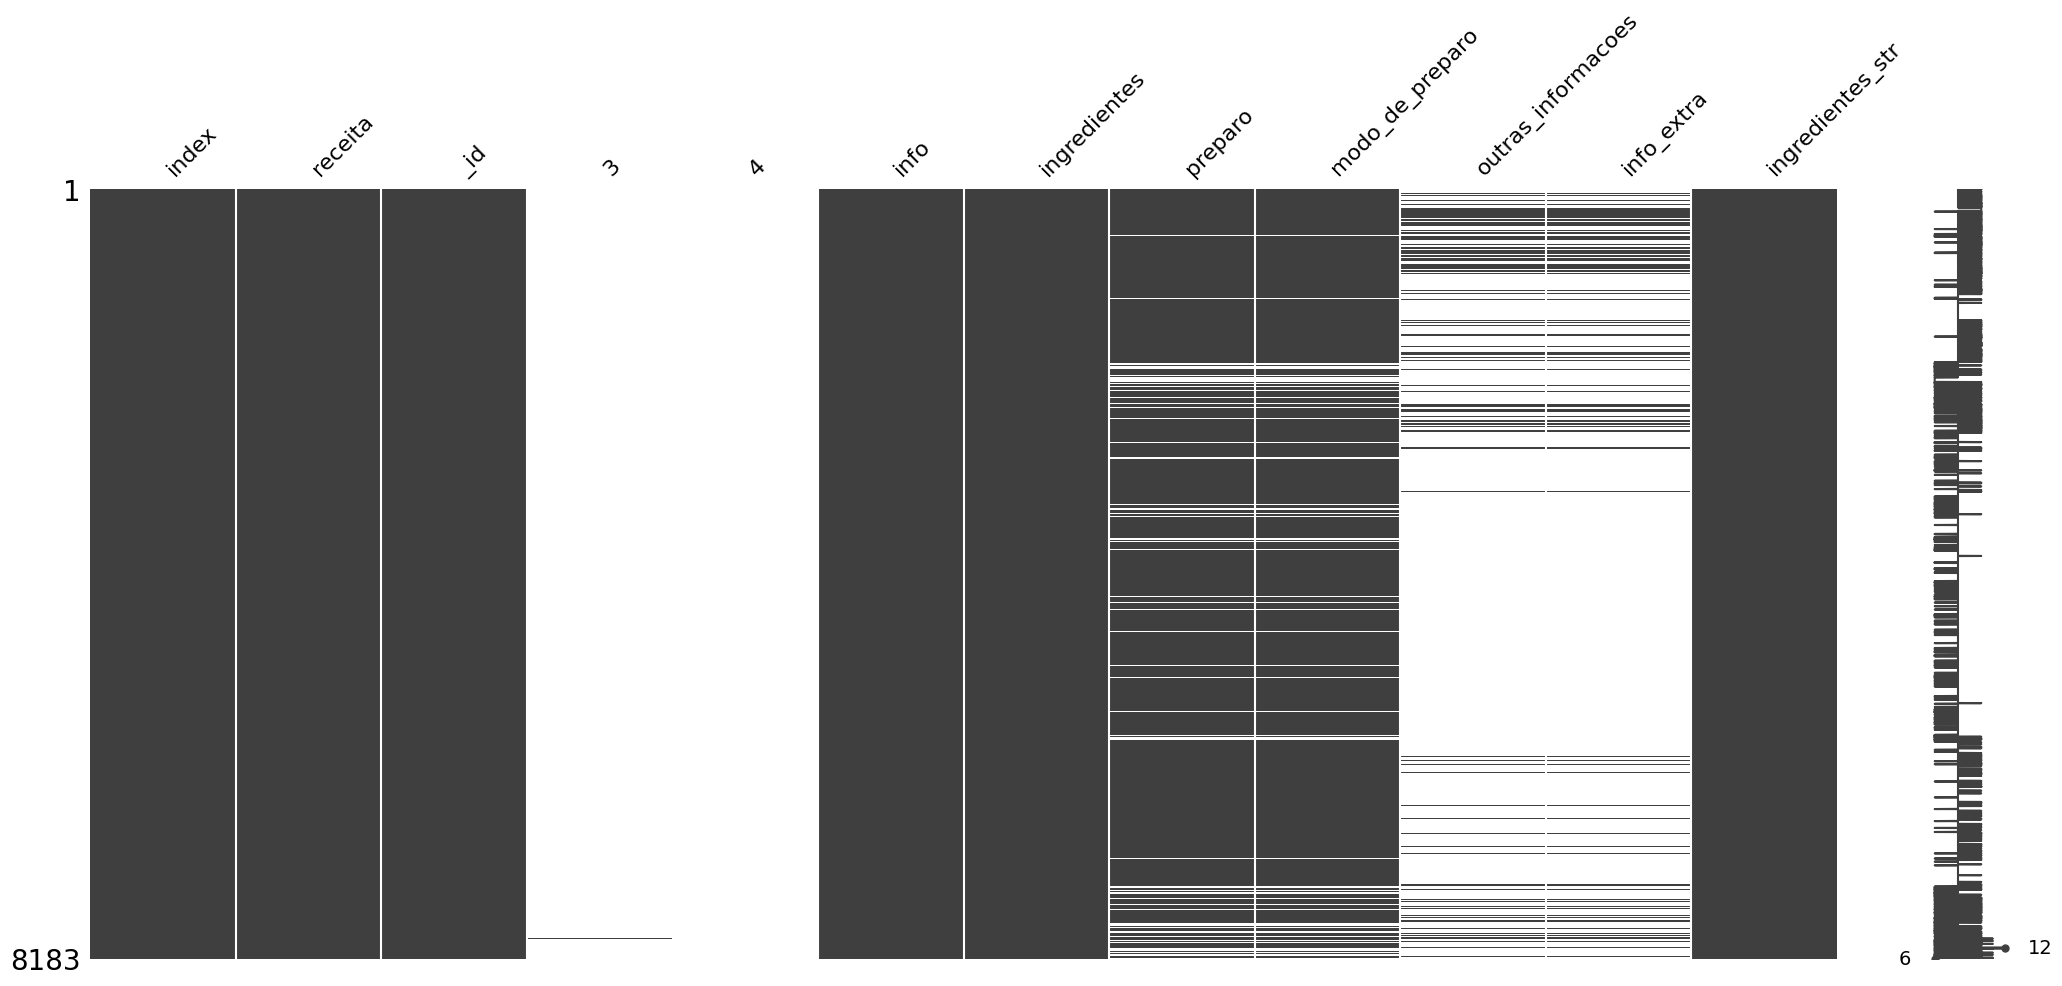

In [92]:
msno.matrix(df2)
plt.show()

# NLP

In [93]:
#Verificando as palavras mais comuns

vocabulary = nltk.FreqDist()
for ingredients in df2['ingredientes_str']:
    ingredients = ingredients.split()
    vocabulary.update(ingredients) 
    
for word, frequency in vocabulary.most_common(200):
    print(f'{word};{frequency}')

de;13112
1;3212
xícara;1865
(chá);1679
-;1509
2;1393
em;1293
(sopa);1224
colher;1217
a;1093
colheres;1080
e;1012
½;811
g;795
leite;686
3;600
gosto,;558
xícaras;529
,;510
farinha;499
4;455
sem;450
sal;426
cebola;355
sopa;336
1/2;325
chá),;319
queijo;316
com;315
açúcar;314
creme;308
lata;304
para;301
chá;297
alho;295
chocolate;289
açúcar,;284
ou;278
água;266
manteiga;249
g),;240
pimenta;233
fermento;231
pó;228
leite,;223
ml;222
do;220
(1;216
sal,;214
trigo;207
gosto;204
trigo,;202
kg;192
•;190
ovos,;184
¼;182
6;180
pó,;176
100;169
água,;169
ralado;169
100g;168
dentes;167
caldo;165
picada;164
Sal;162
meio;156
5;156
cortado;156
azeite;152
pimenta-do-reino;149
suco;147
picado;146
ovos;145
cortada;144
manteiga,;142
01;142
parmesão;139
200;138
no;136
picado,;134
moída;131
molho;129
azeite,;129
copo;128
200g;128
cubos;122
pitada;121
óleo,;121
carne;119
o;119
picada,;118
bem;116
óleo;115
verde;114
limão;112
litro;112
da;110
(ou;110
amargo;110
frango;107
tomate;106
milho;103
reino;100
folhas;100

In [94]:
remove_digits = str.maketrans('', '', digits)

In [95]:
punct = ['.',',','!','?',':',';','(', ')',' ','/']              # Definindo lista de pontuações
stopwords_portugues = nltk.corpus.stopwords.words('portuguese') # Definindo lista de stopwords
medidas_padrao = ['kg','g','ml','xícara','colher','colheres','copo',
                 'chá','café','sopa','sobremesa','gramas','mililitro',
                 'meia','litro','metro','graus','celsius','1⁄2','1/2',
                 '1/3','1/4','xícaras','kg','água']

tokens = [] # Cria lista para armazenar tokens
for receita in df2.ingredientes_str:
    token = (word_tokenize(receita))
    token_wo_number = [x.translate(remove_digits) for x in token]      # remove números https://stackoverflow.com/questions/12851791/removing-numbers-from-string
    token_wo_empty_str = [i for i in token_wo_number if i]             # remove string vazia da lista 
    token_lwr = [x.lower() for x in token_wo_empty_str]                   # Tudo para minúsculo
    token_stp = [x for x in token_lwr if x not in stopwords_portugues] # Remove Stopwords
    token_pct = [x for x in token_stp if x not in punct]               # Remove pontuações
    token_medidas = [x for x in token_pct if x not in medidas_padrao]  # Remove medidas padrão da culinária
    
    tokens.append(token_medidas)                                       # Adiciona tokens a lista
    
# Cria coluna com tokens sem stopwords no dataframe
df2['tokens_clean'] = tokens 

In [96]:
df2['tokens_clean']

0       [farinha, milho, fina, cacau, pó, chocolate, m...
1       [recheio, azeite, alho, picadinhog, cebola, pi...
2       [filés, peixe, branco, limpo, aproximadamente,...
3       [calda, cerejaml, vodca, bourbon, whisky, º, á...
4       [sal, açúcar, ⁄, alho, picado, pimenta-do-rein...
                              ...                        
8178    [chocolate, pó, dr., oetker, leite, açúcar, fa...
8179    [ovos, inteiros, copos, tipo, americano, açúca...
8180    [ovos, leite, farinha, trigo, sal, pires, quei...
8181    [ovos, óleo, chocolate, pó, açúcar, fervente, ...
8182    [lata, leite, condensado, manteiga, lata, crem...
Name: tokens_clean, Length: 8183, dtype: object

In [97]:
df2['tokens_clean'][0]

['farinha',
 'milho',
 'fina',
 'cacau',
 'pó',
 'chocolate',
 'meio',
 'amargo',
 'manteiga',
 'sal',
 'cortada',
 'cubos',
 'suco',
 'gengibre',
 'ovos',
 'açúcar',
 'fermento',
 'pó',
 'nozes',
 'picadas',
 'grosseiramente']

In [98]:
df2['tokens_clean_str'] = df2['tokens_clean'].apply(', '.join)

In [99]:
df2['tokens_clean_str']

0       farinha, milho, fina, cacau, pó, chocolate, me...
1       recheio, azeite, alho, picadinhog, cebola, pic...
2       filés, peixe, branco, limpo, aproximadamente, ...
3       calda, cerejaml, vodca, bourbon, whisky, º, ál...
4       sal, açúcar, ⁄, alho, picado, pimenta-do-reino...
                              ...                        
8178    chocolate, pó, dr., oetker, leite, açúcar, far...
8179    ovos, inteiros, copos, tipo, americano, açúcar...
8180    ovos, leite, farinha, trigo, sal, pires, queij...
8181    ovos, óleo, chocolate, pó, açúcar, fervente, f...
8182    lata, leite, condensado, manteiga, lata, creme...
Name: tokens_clean_str, Length: 8183, dtype: object

In [100]:
list_of_sentences_lemmatized = []
for i in range(len(df2)):
    doc = nlp(df2['tokens_clean_str'][i])
    lemmatized_sentence = "".join([token.lemma_ for token in doc])
    list_of_sentences_lemmatized.append(lemmatized_sentence)

df2['recipe_lemmatized'] = list_of_sentences_lemmatized

In [101]:
df2['recipe_lemmatized']

0       farinha,milho,fino,cacau,pó,chocolate,meio,ama...
1       recheio,azeite,alho,picadinhog,Cebola,picadag,...
2       filés,peixe,branco,limpo,aproximadamente,cada,...
3       calda,cerejaml,vodca,bourbon,whisky,º,álcool,c...
4       sal,açúcar,⁄,alho,picar,pimenta-do-reino,moída...
                              ...                        
8178    chocolate,pó,dr.,oetker,leite,açúcar,farinha,ó...
8179    ovo,inteiro,copo,tipo,americano,açúcar,refinar...
8180    ovo,leite,farinha,trigo,sal,Pires,queijo,parme...
8181    ovo,óleo,chocolate,pó,açúcar,fervente,farinha,...
8182      latar,leite,condensar,manteiga,lata,creme,leite
Name: recipe_lemmatized, Length: 8183, dtype: object

In [102]:
df2['ingredientes_str'][0]

'50 g farinha de milho fina, 10 g de cacau em pó, 250 g de chocolate meio amargo, 200 g de manteiga sem sal cortada em cubos, 20 ml de suco de gengibre, 5 ovos, 200 g de açúcar, 1 colher (chá) de fermento em pó, 100 g de nozes picadas grosseiramente, \xa0'

In [103]:
df2['recipe_lemmatized'][0]

'farinha,milho,fino,cacau,pó,chocolate,meio,amargo,manteiga,sal,cortar,cubo,suco,gengibre,ovo,açúcar,fermento,pó,noz,picar,grosseiramente'

In [104]:
# Instanciando TFIDF 
tfidf = TfidfVectorizer()

In [105]:
# Fitando TFIDF com o corpus
tfidf.fit(df2['recipe_lemmatized'])

TfidfVectorizer()

In [106]:
# Transformando Dados para matriz e aplicando o BOW
tfidf_recipes = tfidf.transform(df2['recipe_lemmatized']) 
tfidf_recipes

<8183x2370 sparse matrix of type '<class 'numpy.float64'>'
	with 28054 stored elements in Compressed Sparse Row format>

In [107]:
# Transformando dados em dataframe para visualização
df_tfidf = pd.DataFrame(tfidf_recipes.todense()) 
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,2360,2361,2362,2363,2364,2365,2366,2367,2368,2369
0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.2335,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.120269,0.0,0.0,0.0,0.0,0.0,0.0
8179,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8180,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.263652,0.0,0.0,0.0,0.0,0.0,0.0
8181,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.172687,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# Ajustando o nome das colunas
mapa_vocabulario = {v: k for k, v in tfidf.vocabulary_.items()}
df_tfidf.columns = df_tfidf.columns.map(mapa_vocabulario)
df_tfidf

,abacate,abacaxi,abacaxis,abacaxi½,abaixo,abelha,aberto,abobora,abobrinha,abobrinhag,...,árvore,época,índia,óleo,óleog,óleokg,óleosal,óleosalsinha,óleo¼,úmir
0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.2335,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.120269,0.0,0.0,0.0,0.0,0.0,0.0
8179,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8180,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.263652,0.0,0.0,0.0,0.0,0.0,0.0
8181,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.172687,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
df_tfidf

,abacate,abacaxi,abacaxis,abacaxi½,abaixo,abelha,aberto,abobora,abobrinha,abobrinhag,...,árvore,época,índia,óleo,óleog,óleokg,óleosal,óleosalsinha,óleo¼,úmir
0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.2335,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.120269,0.0,0.0,0.0,0.0,0.0,0.0
8179,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8180,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.263652,0.0,0.0,0.0,0.0,0.0,0.0
8181,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.172687,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
tfidf_recipes

<8183x2370 sparse matrix of type '<class 'numpy.float64'>'
	with 28054 stored elements in Compressed Sparse Row format>